In [2]:
## Packages
'''Import all the necessary packages and modules'''
%matplotlib inline
import numpy as np # package for playing with matrices
from scipy import special as ssp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import root
import sympy as sp


In [3]:
## Define Equations for generating map of er with S-conductor width and W-gap width as indices
'''Set up all the equations From Simon 2001 book'''

k = lambda S, W : S/(S+2*W); # Modulus of Elliptic Integral of the 1st kind dependent on CPW 
k1 = lambda S, W : np.sinh(np.pi*S/(4*H))/(np.sinh((np.pi*(S+2*W))/(4*H))); # Modulus of Elliptic Integral of the 1st kind dependent on CPW 
kp = lambda S, W : (1-k(S,W)**2)**.5; # k' 
k1p = lambda S, W :(1-k1(S,W)**2)**.5; # k1'
K = lambda S, W : ssp.ellipk(k(S,W)**2); # Elliptic Integral of the 1st kind of k
K1 = lambda S, W : ssp.ellipk(k1(S,W)**2);
Kp = lambda S, W : ssp.ellipk(kp(S,W)**2);
K1p = lambda S, W :ssp.ellipk(k1p(S,W)**2);
ef = lambda S, W, er :  1+((er-1)/2)*(K1(S,W)/K1p(S,W))*(Kp(S,W)/K(S,W));#effective dielectric constant
Z0 = lambda S, W, er : (30*np.pi/(ef(S,W,er)**.5))*(Kp(S,W)/K(S,W))
Z1 = 50 # set to 50 ohm
Er = lambda S, W : (1800*np.pi**2 * Kp(S,W)**2 * K1p(S,W) + K(S,W)*Kp(S,W)*K1(S,W)*Z1**2-2*K(S,W)**2 * K1p(S,W)*Z1**2)/(K(S,W)*Kp(S,W)*K1(S,W)*Z1**2) #Calculated Er with results in order 
#'''Er has data in the order Er(S1,W1), Er(S1, W2), ... Er(S1, W[len(w)-1], Er(S1, W[len(w)]) '''

In [4]:
## Create Data for plotting
er=2.33; # Dielectric constant
H=500; # um Thickness/Height of substrate
size=1001
d=1
s=np.arange(1,size,d) # Conductor Width in um
w=np.arange(1,size,d) # Gap Width in um
s1=np.repeat(s,len(w)) # Creating Mesh of data points for image 
# S=(1,1,1,1,1,2,2,2,2,2,...size-1,size-1,size-1) at positions [0,0,...0,0,1,1,...1,1,...,size,size,...size,size] repeat len(w)
w1=np.tile(w,len(s)) # Creating Mesh of data points for image
# W=(1,2,...size-1,size,1,2,...size-1,size,...) repeats len(s)
pEr=np.flipud(np.resize(Er(s1,w1),[len(s),len(w)]).T)# convert Er to a plottable image

In [5]:
## Solve for different er - produces contour lines
'''Set up all the equations From Simon 2001 book'''
W=sp.Symbol('W')
size=1001
d=1
s=np.arange(1,size,d) # Conductor Width in um
H=500; # um Thickness/Height of substrate
er=2.33; # Dielectric constant
k = lambda S, W : S/(S+2*W); # Modulus of Elliptic Integral of the 1st kind dependent on CPW 
k1 = lambda S, W : sp.sinh(np.pi*S/(4*H))/(sp.sinh((np.pi*(S+2*W))/(4*H))); # Modulus of Elliptic Integral of the 1st kind dependent on CPW 
kp = lambda S, W : (1-k(S,W)**2)**.5; # k' 
k1p = lambda S, W :(1-k1(S,W)**2)**.5; # k1'
K = lambda S, W : sp.special.elliptic_integrals.elliptic_k(k(S,W)**2); # Elliptic Integral of the 1st kind of k
K1 = lambda S, W : sp.special.elliptic_integrals.elliptic_k(k1(S,W)**2);
Kp = lambda S, W : sp.special.elliptic_integrals.elliptic_k(kp(S,W)**2);
K1p = lambda S, W :sp.special.elliptic_integrals.elliptic_k(k1p(S,W)**2);
Z1 = 50 # set to 50 ohm
Er = lambda S, W : (1800*np.pi**2 * Kp(S,W)**2 * K1p(S,W) + K(S,W)*Kp(S,W)*K1(S,W)*Z1**2-2*K(S,W)**2 * K1p(S,W)*Z1**2)/(K(S,W)*Kp(S,W)*K1(S,W)*Z1**2) #Calculated Er with results in order 

In [6]:
## Actual Solution for the values listed in val - used solsize to limit solutions to those needed
'''Iterates through sympy solver for different S calculating the appropriate W such that the er=val '''
solsize=625
val=[1,2,3.8,4.4,6.7,10,13.1,15]
sol=np.zeros([solsize,len(val)])
a=0

for j in np.arange(len(val)):
    a=0
    
    for i in s[0:solsize-1]:
        sol[a,j]= sp.functions.re(sp.nsolve(Er(int(i),W)-val[j],int(i)))
        a+=1

In [8]:
## Define region beneath curve set by L=s+3*W = CPW total width 
'''Used thresh 625 so that 8 CPWs could fit on 5 mm with a 1 W between each'''
L=np.zeros([size,size])
for i in w:
    for j in s:
    
        L[j-1,i-1]=s[i-1]+3*w[j-1]
Thresh=625
L[L<=Thresh]=False
L[L>Thresh]=True
L=np.flipud(L)

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


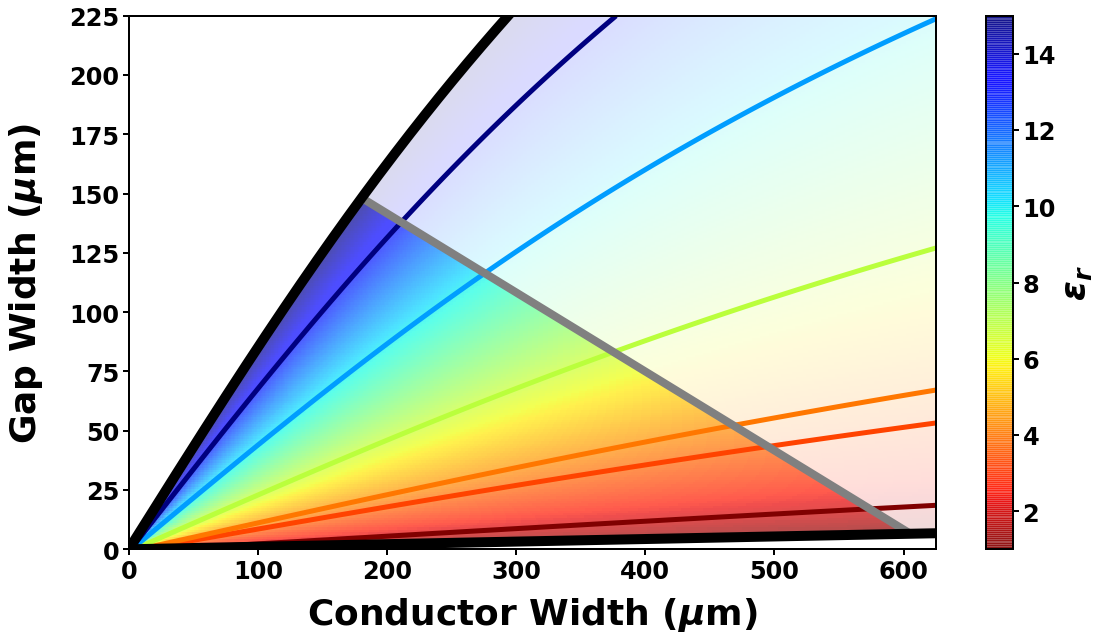

In [30]:
## Plot Data
''' Plot all the results on 1 graph to make it look pretty used
dimx# to piece together the lines to create a nice effect with contour lines. 
I could plot all the different contours with sol values but the contours lines worked well enough.'''

Data_Name='Er Calculated' # Plot Title
plt.rc('font', weight='bold') # Plot fonts are all bold
plt.rcParams['axes.linewidth']=2 #Plot Frame linewidth is 2
plt.rcParams['figure.figsize'] = (16,9) #Plot Frame set at 16,9
plt.rcParams.update({'figure.autolayout': True})
#Pretty colors used to generate the plot and hide 0's
my_cmap = cm.jet_r 
my_cmap.set_under('k', alpha=0)
my_cmap.set_over('k', alpha=0)
my_cmap1 = cm.jet
my_cmap1.set_under('k', alpha=0)
my_cmap2 = cm.binary_r
my_cmap2.set_under('k', alpha=0)


fig = plt.figure() # Generates plot
# fig.suptitle(Data_Name, fontsize=36, fontweight='bold') # Adds Data_name as Plot Title

ax = fig.add_subplot(111) # Used to manipulate image on top of the frame

# Plot labels and ticks
ax.set_xlabel(r'Conductor Width ($\mu$m)', fontsize=36, fontweight='bold', labelpad=12)
ax.set_ylabel(r'Gap Width ($\mu$m)', fontsize=36, fontweight='bold',labelpad=24)

ax.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)

# Cludgey dim values to make it pretty
dimx=solsize
dimy=225
dimx2=23
dimx3=185
dimx4=400

# Contour parameters
X=s[0:dimx]
Y=np.flipud(w[0:dimy])
Z=pEr[pEr.shape[0]-dimy-1:-1,0:dimx]

# Plotting all the images - Each plotted on top of the last makes a stack - order important
imgplot1=ax.imshow(pEr[size-dimy:-1,0:dimx], cmap=my_cmap, aspect='auto', clim=[1,15], extent=[0,dimx,0,dimy],alpha=.7)
imgplot2=ax.imshow(L[1000-dimy:-1,0:dimx],  extent=[0,dimx,0,dimy], cmap=my_cmap2, aspect='auto',  clim=[.1,1],alpha=.8)
linplot1=ax.plot(X[0:dimx3-5],-X[0:dimx3-5]/3+625/3, color='white', linewidth=10)
linplot2=ax.plot(X[dimx-dimx2+5:-1],-X[dimx-dimx2+5:-1]/3+625/3, color='white', linewidth=10)
contplot1=ax.contour(X, Y, Z,levels=[2,3.8,4.4,6.7,10,13.1],cmap=my_cmap, linewidths=5, alpha=1)
linplot3=ax.plot(X[dimx3:dimx-dimx2],-X[dimx3:dimx-dimx2]/3+625/3, color='grey', linewidth=8)
linplot4=ax.plot(X[0:sol[:-1,0][sol[:-1,0]<dimy].shape[0]],sol[:-1,0][sol[:-1,0]<dimy], color='black', linewidth=10)
linplot5=ax.plot(X[0:sol[:,-1][sol[:,-1]<dimy].shape[0]-1],sol[:-1,-1][sol[:-1,-1]<dimy], color='black', linewidth=10)

# The colorbar generation and settings
cbar=plt.colorbar(imgplot1)
cbar.ax.tick_params(labelsize=24, width=2, length=6)
cbar.set_label(r"$\epsilon _r$", size=36)



In [32]:
## Output Image
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
root.withdraw() # closes the tkinter window since it's unnecessary

''

In [31]:
file_name='Er_Calculated'
ext='.png'
file_loc=root.directory+'/'+file_name+ext
file_loc

'Z:/COMSOL/Carrier/Er_Calculated.png'

In [33]:
fig.savefig(file_loc,dpi=600)